# TUGAS DATA MINING

## Melakukan EDA dan Propose Hipotesis tentang COVID-19 

## Kelompok 2 Komputasi

1. Rani Istiqomah (11170940000007)
2. Rista Cahya Putri (11170940000008)
3. Nadhilah Farhana (11160940000084)
4. Panji Reza Pratama (11160940000044)
5. Tsabita Mahdiyyah Umar (11170940000030)
6. Nihayah Azzahra (11170940000015)
7. Riza Fahriska (11170940000045)
8. Rizki Maulana (11160940000041)

In [11]:
# Importing Modules untuk Notebook ini
import warnings; warnings.simplefilter('ignore')
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns

## Data 1 Statistik Perkembangan COVID19 Indonesia

In [20]:
d1 = pd.read_csv('Statistik_Perkembangan_COVID19_Indonesia (1).csv')
B, K = d1.shape
print('baris = ', B, ', Kolom = ', K)
d1.head()

baris =  89 , Kolom =  16


,Hari_ke,Tanggal,Jumlah_Kasus_Baru_per_Hari,Jumlah_Kasus_Kumulatif,Jumlah_pasien_dalam_perawatan,Persentase_Pasien_dalam_Perawatan,Jumlah_Pasien_Sembuh,Persentase_Pasien_Sembuh,Jumlah_Pasien_Meninggal,Persentase_Pasien_Meninggal,Jumlah_Kasus_Sembuh_per_Hari,Jumlah_Kasus_Meninggal_per_Hari,Jumlah_Kasus_Dirawat_per_Hari,Kasus_Sedang_Investigasi_Lapangan,Pembaruan_Terakhir,FID
0,1,2020-03-02T00:00:00.000Z,2.0,2.0,2.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35.0,2020-04-10T15:39:22.000Z,1
1,2,2020-03-03T00:00:00.000Z,0.0,2.0,2.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,2
2,3,2020-03-04T00:00:00.000Z,0.0,2.0,2.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,3
3,4,2020-03-05T00:00:00.000Z,0.0,2.0,2.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,4
4,5,2020-03-06T00:00:00.000Z,2.0,4.0,4.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,NaN,NaN,5


In [21]:
# Cek type data
d1.dtypes

Hari_ke                                int64
Tanggal                               object
Jumlah_Kasus_Baru_per_Hari           float64
Jumlah_Kasus_Kumulatif               float64
Jumlah_pasien_dalam_perawatan        float64
Persentase_Pasien_dalam_Perawatan    float64
Jumlah_Pasien_Sembuh                 float64
Persentase_Pasien_Sembuh             float64
Jumlah_Pasien_Meninggal              float64
Persentase_Pasien_Meninggal          float64
Jumlah_Kasus_Sembuh_per_Hari         float64
Jumlah_Kasus_Meninggal_per_Hari      float64
Jumlah_Kasus_Dirawat_per_Hari        float64
Kasus_Sedang_Investigasi_Lapangan    float64
Pembaruan_Terakhir                    object
FID                                    int64
dtype: object

In [22]:
# Mengubah type data
d1['Tanggal']=d1['Tanggal'].astype('datetime64')
d1['Pembaruan_Terakhir']=d1['Pembaruan_Terakhir'].astype('datetime64')

In [23]:
d1.dtypes

Hari_ke                                       int64
Tanggal                              datetime64[ns]
Jumlah_Kasus_Baru_per_Hari                  float64
Jumlah_Kasus_Kumulatif                      float64
Jumlah_pasien_dalam_perawatan               float64
Persentase_Pasien_dalam_Perawatan           float64
Jumlah_Pasien_Sembuh                        float64
Persentase_Pasien_Sembuh                    float64
Jumlah_Pasien_Meninggal                     float64
Persentase_Pasien_Meninggal                 float64
Jumlah_Kasus_Sembuh_per_Hari                float64
Jumlah_Kasus_Meninggal_per_Hari             float64
Jumlah_Kasus_Dirawat_per_Hari               float64
Kasus_Sedang_Investigasi_Lapangan           float64
Pembaruan_Terakhir                   datetime64[ns]
FID                                           int64
dtype: object

In [24]:
#Cek apakah terdapat missing value
d1.describe(include='all')

,Hari_ke,Tanggal,Jumlah_Kasus_Baru_per_Hari,Jumlah_Kasus_Kumulatif,Jumlah_pasien_dalam_perawatan,Persentase_Pasien_dalam_Perawatan,Jumlah_Pasien_Sembuh,Persentase_Pasien_Sembuh,Jumlah_Pasien_Meninggal,Persentase_Pasien_Meninggal,Jumlah_Kasus_Sembuh_per_Hari,Jumlah_Kasus_Meninggal_per_Hari,Jumlah_Kasus_Dirawat_per_Hari,Kasus_Sedang_Investigasi_Lapangan,Pembaruan_Terakhir,FID
count,89.000000,89,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,1.0,1,89.000000
unique,NaN,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
top,NaN,2020-03-13 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-04-10 15:39:22,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
first,NaN,2020-03-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-04-10 15:39:22,NaN
last,NaN,2020-05-29 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-04-10 15:39:22,NaN
mean,45.000000,NaN,100.976190,1068.047619,904.095238,89.168651,72.476190,4.836690,91.476190,5.994659,8.547619,8.880952,83.500000,35.0,NaN,45.000000
std,25.836021,NaN,101.469565,1224.001235,1022.800288,5.853273,96.194224,2.703814,106.365508,3.644107,13.501946,10.604192,82.296089,NaN,NaN,25.836021
min,1.000000,NaN,0.000000,2.000000,2.000000,82.739920,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.0,NaN,1.000000
25%,23.000000,NaN,14.000000,42.750000,39.000000,84.482322,2.000000,4.037928,1.750000,2.941176,0.000000,0.000000,14.000000,35.0,NaN,23.000000


In [25]:
# Menghitung jumlah data missing
d1.isnull().sum()

Hari_ke                               0
Tanggal                               0
Jumlah_Kasus_Baru_per_Hari           47
Jumlah_Kasus_Kumulatif               47
Jumlah_pasien_dalam_perawatan        47
Persentase_Pasien_dalam_Perawatan    47
Jumlah_Pasien_Sembuh                 47
Persentase_Pasien_Sembuh             47
Jumlah_Pasien_Meninggal              47
Persentase_Pasien_Meninggal          47
Jumlah_Kasus_Sembuh_per_Hari         47
Jumlah_Kasus_Meninggal_per_Hari      47
Jumlah_Kasus_Dirawat_per_Hari        47
Kasus_Sedang_Investigasi_Lapangan    88
Pembaruan_Terakhir                   88
FID                                   0
dtype: int64

In [26]:
# Menghapus variabel(kolom) Kasus_Sedang_Investigasi_Lapangan dan Pembaruan_Terakhir
# karena lebih dari 50% observasi yang missing values
# serta menghapus variabel FID karena diasumsikan sama dengan Hari_ke
# dan menghapus baris yang terdapat NaN nya atau missing values nya

d1.drop("Kasus_Sedang_Investigasi_Lapangan", axis=1, inplace=True)
d1.drop("Pembaruan_Terakhir", axis=1, inplace=True)
d1.drop("FID", axis=1, inplace=True)
d1 = d1.dropna()

In [27]:
# terdapat isi data yang 0 berupa nilai dan bukan missing values
d1 = d1.fillna(0)
d1['Jumlah_Kasus_Baru_per_Hari']=d1['Jumlah_Kasus_Baru_per_Hari'].astype(int)
d1['Jumlah_Kasus_Kumulatif']=d1['Jumlah_Kasus_Kumulatif'].astype(int)
d1['Jumlah_pasien_dalam_perawatan']=d1['Jumlah_pasien_dalam_perawatan'].astype(int)
d1['Jumlah_Pasien_Sembuh']=d1['Jumlah_Pasien_Sembuh'].astype(int)
d1['Jumlah_Pasien_Meninggal']=d1['Jumlah_Pasien_Meninggal'].astype(int)
d1['Jumlah_Kasus_Sembuh_per_Hari']=d1['Jumlah_Kasus_Sembuh_per_Hari'].astype(int)
d1['Jumlah_Kasus_Meninggal_per_Hari']=d1['Jumlah_Kasus_Meninggal_per_Hari'].astype(int)
d1['Jumlah_Kasus_Dirawat_per_Hari']=d1['Jumlah_Kasus_Dirawat_per_Hari'].astype(int)

In [28]:
# Menampikan type data setelah di konversi
d1.dtypes

Hari_ke                                       int64
Tanggal                              datetime64[ns]
Jumlah_Kasus_Baru_per_Hari                    int32
Jumlah_Kasus_Kumulatif                        int32
Jumlah_pasien_dalam_perawatan                 int32
Persentase_Pasien_dalam_Perawatan           float64
Jumlah_Pasien_Sembuh                          int32
Persentase_Pasien_Sembuh                    float64
Jumlah_Pasien_Meninggal                       int32
Persentase_Pasien_Meninggal                 float64
Jumlah_Kasus_Sembuh_per_Hari                  int32
Jumlah_Kasus_Meninggal_per_Hari               int32
Jumlah_Kasus_Dirawat_per_Hari                 int32
dtype: object

In [29]:
# Menampilkan head data setelah drop missing value
B, K = d1.shape
print('baris = ', B, ', Kolom = ', K)
d1.head()

baris =  42 , Kolom =  13


,Hari_ke,Tanggal,Jumlah_Kasus_Baru_per_Hari,Jumlah_Kasus_Kumulatif,Jumlah_pasien_dalam_perawatan,Persentase_Pasien_dalam_Perawatan,Jumlah_Pasien_Sembuh,Persentase_Pasien_Sembuh,Jumlah_Pasien_Meninggal,Persentase_Pasien_Meninggal,Jumlah_Kasus_Sembuh_per_Hari,Jumlah_Kasus_Meninggal_per_Hari,Jumlah_Kasus_Dirawat_per_Hari
0,1,2020-03-02,2,2,2,100.0,0,0.0,0,0.0,0,0,0
1,2,2020-03-03,0,2,2,100.0,0,0.0,0,0.0,0,0,0
2,3,2020-03-04,0,2,2,100.0,0,0.0,0,0.0,0,0,0
3,4,2020-03-05,0,2,2,100.0,0,0.0,0,0.0,0,0,0
4,5,2020-03-06,2,4,4,100.0,0,0.0,0,0.0,0,0,2


In [30]:
# Statistika Deskriptif
d1.describe(include='all')

,Hari_ke,Tanggal,Jumlah_Kasus_Baru_per_Hari,Jumlah_Kasus_Kumulatif,Jumlah_pasien_dalam_perawatan,Persentase_Pasien_dalam_Perawatan,Jumlah_Pasien_Sembuh,Persentase_Pasien_Sembuh,Jumlah_Pasien_Meninggal,Persentase_Pasien_Meninggal,Jumlah_Kasus_Sembuh_per_Hari,Jumlah_Kasus_Meninggal_per_Hari,Jumlah_Kasus_Dirawat_per_Hari
count,42.000000,42,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000
unique,NaN,42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2020-03-13 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2020-03-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2020-04-12 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,21.500000,NaN,100.976190,1068.047619,904.095238,89.168651,72.476190,4.836690,91.476190,5.994659,8.547619,8.880952,83.500000
std,12.267844,NaN,101.469565,1224.001235,1022.800288,5.853273,96.194224,2.703814,106.365508,3.644107,13.501946,10.604192,82.296089
min,1.000000,NaN,0.000000,2.000000,2.000000,82.739920,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11.250000,NaN,14.000000,42.750000,39.000000,84.482322,2.000000,4.037928,1.750000,2.941176,0.000000,0.000000,14.000000


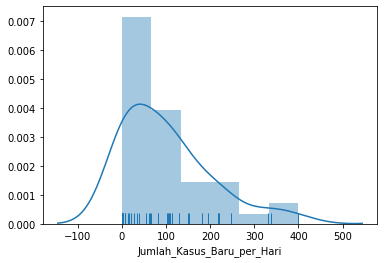

In [31]:
# Distributions
sns.distplot(d1['Jumlah_Kasus_Baru_per_Hari'], kde = True, rug = True)

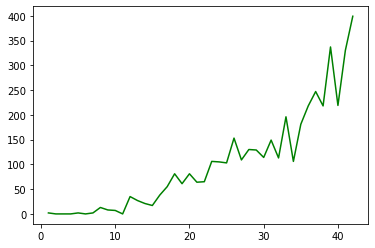

In [32]:
plt.plot(d1.Hari_ke, d1.Jumlah_Kasus_Baru_per_Hari, color='green')

Berdasarkan grafik, terlihat bahwa jumlah kasus positif yang terjangkit COVID-19 baru per hari semakin meningkat. Untuk menekan jumlah kasus positif COVID-19, maka harus ada respon yang lebih cepat dan efektif dari pemerintah dan masyarakat dalam menangani kasus COVID-19 ini.

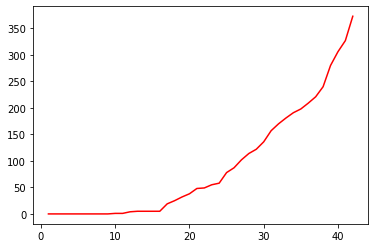

In [73]:
plt.plot(d1.Hari_ke, d1.Jumlah_Pasien_Meninggal, color='red')

Berdasarkan grafik, terlihat bahwa jumlah pasien yang meninggal karena COVID-19 semakin meningkat secara signifikan. Untuk menekan jumlah kasus kematian karena COVID-19, maka masyarakat harus lebih disiplin terhadap aturan dan himbauan dari pemerintah.

## Data 2 COVID19 Indonesia per Provinsi

In [33]:
d2 = pd.read_csv('COVID19_Indonesia_per_Provinsi.csv')
B, K = d2.shape
print('baris = ', B, ', Kolom = ', K)
d2.head()

baris =  35 , Kolom =  8


,X,Y,FID,Kode_Provi,Provinsi,Kasus_Posi,Kasus_Semb,Kasus_Meni
0,96.909523,4.225082,1,11,Aceh,5,1,1
1,99.057888,2.184779,2,12,Sumatera Utara,65,8,8
2,100.466805,-0.851914,3,13,Sumatera Barat,44,6,3
3,101.812892,0.510526,4,14,Riau,16,1,0
4,103.599320,-1.617750,5,15,Jambi,4,0,0


In [34]:
# Karena datanya ada 35 yang seharusnya ada 34 maka dicek data terakhir
d2.tail()

,X,Y,FID,Kode_Provi,Provinsi,Kasus_Posi,Kasus_Semb,Kasus_Meni
30,129.360425,-3.126119,31,81,Maluku,11,1,0
31,128.015929,0.869337,32,82,Maluku Utara,2,1,0
32,140.000000,-5.000000,33,94,Papua,63,5,3
33,132.968342,-2.041723,34,91,Papua Barat,3,0,1
34,113.915865,-0.989818,35,0,Indonesia,35,0,0


In [35]:
# Drop kolom pertama, kedua, ketiga dan keempat karena tidak berguna (hanya longitudinal dan index)
d2.drop("X", axis = 1, inplace = True)
d2.drop("Y", axis = 1, inplace = True)
d2.drop("FID", axis = 1, inplace = True)
d2.drop("Kode_Provi", axis = 1, inplace = True)

In [36]:
# Drop baris terakhir karena bukan provinsi dan provinsi di Indonesia ada 34 bukan 35
d2 = d2.drop(d2.index[34])

In [37]:
# Cek type data
d2.dtypes

Provinsi      object
Kasus_Posi     int64
Kasus_Semb     int64
Kasus_Meni     int64
dtype: object

In [38]:
# Menghitung jumlah data missing
d2.isnull().sum()

Provinsi      0
Kasus_Posi    0
Kasus_Semb    0
Kasus_Meni    0
dtype: int64

In [39]:
# Statistika Deskriptif
d2.describe(include='all')

,Provinsi,Kasus_Posi,Kasus_Semb,Kasus_Meni
count,34,34.000000,34.000000,34.000000
unique,34,NaN,NaN,NaN
top,Daerah Istimewa Yogyakarta,NaN,NaN,NaN
freq,1,NaN,NaN,NaN
mean,NaN,123.705882,10.558824,10.970588
std,NaN,356.887685,26.427937,33.923698
min,NaN,1.000000,0.000000,0.000000
25%,NaN,6.500000,1.000000,1.000000
50%,NaN,20.500000,2.000000,1.500000
75%,NaN,58.250000,6.750000,3.000000


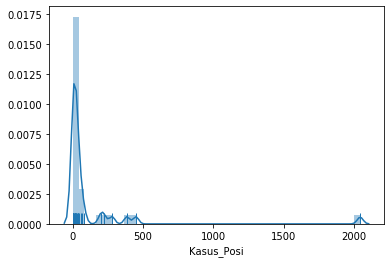

In [40]:
# Distributions
sns.distplot(d2['Kasus_Posi'], kde = True, rug = True)

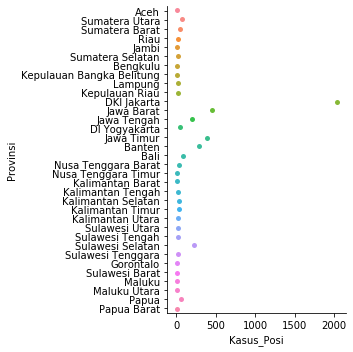

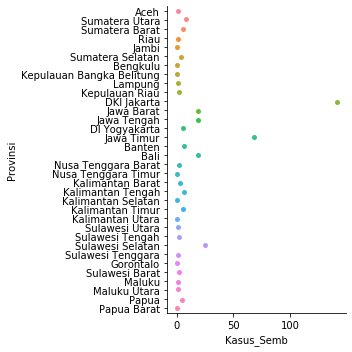

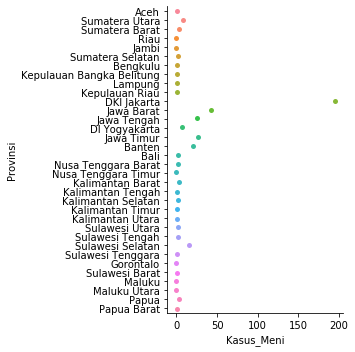

In [77]:
p = sns.catplot(x="Kasus_Posi", y="Provinsi", data=d2)
p = sns.catplot(x="Kasus_Semb", y="Provinsi", data=d2)
p = sns.catplot(x="Kasus_Meni", y="Provinsi", data=d2)

Terlihat bahwa persebaran kasus COVID-19 pada kasus positif, sembuh, dan meninggal terbanyak berada di DKI Jakarta. 

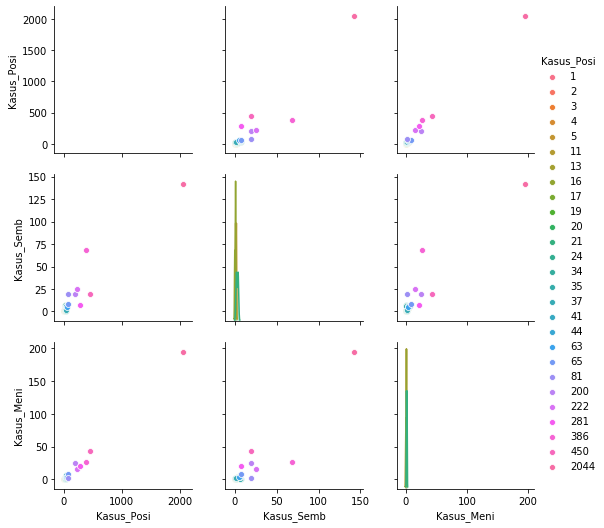

In [80]:
p = sns.pairplot(d2, hue= "Kasus_Posi")

Dari grafik di atas, kita dapat melihat perbandingan antar variable.

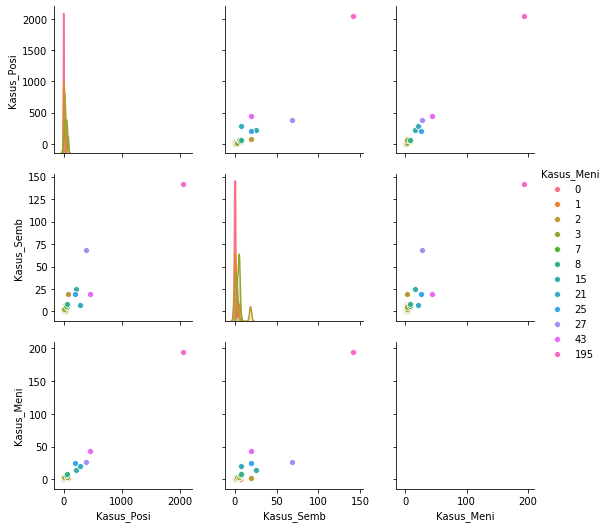

In [84]:
p = sns.pairplot(d2[['Kasus_Posi', 'Kasus_Semb', 'Kasus_Meni']], hue = "Kasus_Meni")

## Data 3 132 Rumah Sakit Rujukan COVID19 di Indonesia

In [52]:
d3 = pd.read_csv('132-rumah-sakit-rujukan-covid-19-di-indonesia.csv')
B, K = d3.shape
print('baris = ', B, ', Kolom = ', K)
d3.head()

baris =  34 , Kolom =  2


,nama_data,value
0,Jawa Tengah,13
1,Jawa Timur,11
2,DKI Jakarta,8
3,Jawa Barat,8
4,Sulawesi Selatan,7


In [53]:
# Mengubah nama kolom 
d3 = d3.rename(columns = {'nama_data' : 'Provinsi'})
d3 = d3.rename(columns = {'value' : 'jml_rs_rujukan'})
d3.head()

,Provinsi,jml_rs_rujukan
0,Jawa Tengah,13
1,Jawa Timur,11
2,DKI Jakarta,8
3,Jawa Barat,8
4,Sulawesi Selatan,7


In [54]:
# Cek type data
d3.dtypes

Provinsi          object
jml_rs_rujukan     int64
dtype: object

In [55]:
# Menghitung jumlah data missing
d3.isnull().sum()

Provinsi          0
jml_rs_rujukan    0
dtype: int64

In [56]:
# Statistika Deskriptif
d3.describe(include='all')

,Provinsi,jml_rs_rujukan
count,34,34.000000
unique,34,NaN
top,Sulawesi Tengah,NaN
freq,1,NaN
mean,NaN,3.882353
std,NaN,2.771770
min,NaN,1.000000
25%,NaN,2.000000
50%,NaN,3.000000
75%,NaN,4.750000


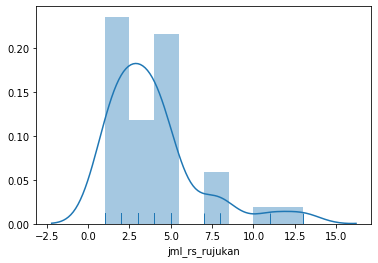

In [57]:
# Distributions
sns.distplot(d3['jml_rs_rujukan'], kde = True, rug = True)

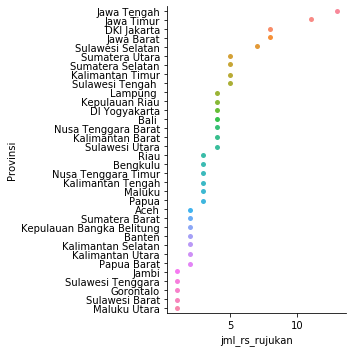

In [58]:
p= sns.catplot(y="Provinsi", x="jml_rs_rujukan", data=d3)

Untuk beberapa daerah, jumlah rumah sakit berdasarkan rujukan dari pemerintah cukup efektif untuk meningkatkan jumlah pasien yang sembuh. Tetapi, masih ada beberapa daerah yang kekurangan jumlah rumah sakit rujukan sehingga angka kematian di daerah tersebut masih cukup tinggi.
Untuk Indonesia bagian timur, masih minimnya pengawaasn dari pemerintah terkait jumlah rumah sakit rujukan. 

## Dataframe baru (df23) gabungan dari data 2 dan data 3

In [59]:
# Melihat perbedaan nama provinsi dari data 2 dan data 3 sebelum di merge
# dengan melihat unique dari provinsi data 2 dan 3

d2.Provinsi.unique()

array(['Aceh', 'Sumatera Utara', 'Sumatera Barat', 'Riau', 'Jambi',
       'Sumatera Selatan', 'Bengkulu', 'Kepulauan Bangka Belitung',
       'Lampung', 'Kepulauan Riau', 'DKI Jakarta', 'Jawa Barat',
       'Jawa Tengah', 'Daerah Istimewa Yogyakarta', 'Jawa Timur',
       'Banten', 'Bali', 'Nusa Tenggara Barat', 'Nusa Tenggara Timur',
       'Kalimantan Barat', 'Kalimantan Tengah', 'Kalimantan Selatan',
       'Kalimantan Timur', 'Kalimantan Utara', 'Sulawesi Utara',
       'Sulawesi Tengah', 'Sulawesi Selatan', 'Sulawesi Tenggara',
       'Gorontalo', 'Sulawesi Barat', 'Maluku', 'Maluku Utara', 'Papua',
       'Papua Barat'], dtype=object)

In [60]:
d3.Provinsi.unique()

array(['Jawa Tengah', 'Jawa Timur', 'DKI Jakarta', 'Jawa Barat',
       'Sulawesi Selatan', 'Sumatera Utara', 'Sumatera Selatan',
       'Kalimantan Timur', 'Sulawesi Tengah ', 'Lampung ',
       'Kepulauan Riau', 'DI Yogyakarta', 'Bali ', 'Nusa Tenggara Barat',
       'Kalimantan Barat', 'Sulawesi Utara', 'Riau', 'Bengkulu',
       'Nusa Tenggara Timur', 'Kalimantan Tengah', 'Maluku', 'Papua',
       'Aceh', 'Sumatera Barat', 'Kepulauan Bangka Belitung', 'Banten',
       'Kalimantan Selatan', 'Kalimantan Utara', 'Papua Barat', 'Jambi',
       'Sulawesi Tenggara', 'Gorontalo', 'Sulawesi Barat', 'Maluku Utara'],
      dtype=object)

Terlihat bahwa nama provinsi Yogyakarta, Sulawesi Tengah, Lampung, dan Bali dari kedua data tersebut beda

In [61]:
d2['Provinsi'] = d2.replace('Daerah Istimewa Yogyakarta', 'DI Yogyakarta')
d3['Provinsi'] = d3.replace('Sulawesi Tengah ', 'Sulawesi Tengah')
d3['Provinsi'] = d3.replace('Bali ', 'Bali')
d3['Provinsi'] = d3.replace('Lampung ', 'Lampung')

In [62]:
df23 = d2.merge(d3, on = 'Provinsi')
df23

,Provinsi,Kasus_Posi,Kasus_Semb,Kasus_Meni,jml_rs_rujukan
0,Aceh,5,1,1,2
1,Sumatera Utara,65,8,8,5
2,Sumatera Barat,44,6,3,2
3,Riau,16,1,0,3
4,Jambi,4,0,0,1
5,Sumatera Selatan,21,4,2,5
6,Bengkulu,4,0,1,3
7,Kepulauan Bangka Belitung,4,0,1,2
8,Lampung,20,1,1,4
9,Kepulauan Riau,21,2,1,4


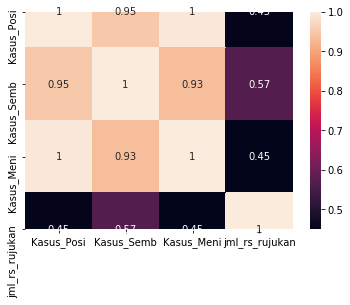

In [81]:
corr= df23.corr()
sns.heatmap(corr,annot=True)

Melalui grafik di atas, kita dapat melihat bahwa terdaoat korelasi yang kuat untuk Kasus Positif, Sembuh, dan Meninggal untuk penyakit COVID-19.

In [68]:
#Apakah jumlah rs rujukan berpengaruh signifikan terhadap kasus sembuh 
#Koefisien Korelasi
from scipy.stats.stats import pearsonr
x = df23['jml_rs_rujukan']
y = df23['Kasus_Semb']
pearsonr(x,y)

(0.5684950648200741, 0.0004519369071727004)

Dilihat dari hasil koefisien korelasi dengan nilai 0.56 dapat dikatakan nilainya cukup besar, artinya kasus sembuh cukup dipengaruhi adanya jumlah rumah sakit rujukan di berbagai provinsi. 

# Kesimpulan

Dilihat dari data dan analisis yang kami lakukan, disimpulkan bahwa penyakit COVID-19 menyebar secara cepat, dengan tingkat kematian yang meningkat secara cepat juga. Pemerintah serta masyarakat harus lebih peduli dengan masalah wabah penyakit yang terjadi saat ini. Jika kepedulian untuk penyakit ini tidak terus ditingkatkan, maka bukan tidak mungkin jika kedepannya angka kasus positif dan kasus meningggal akan terus meningkat.